In [23]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#building a corpus of documents
corpus=['The sky is blue and beautiful.',
       'Love this blue and beautiful sky!',
       'The quick brown fox jumps over the lazy dog.',
       "A king's breakfast has sausages, ham, bacon, eggs, toast, beans",
       'I love green eggs, ham, sausages and bacon!',
       'The brown fox is quick and the blue dog is lazy!',
       'The sky is very blue and the sky is very beautiful today',
       'The dog is lazy but the brown fox is quick!']

In [ ]:
labels=['weather', 'weather', 'animals', 'food', 'food','animals', 'weather','animals']

In [ ]:
corpus=np.array(corpus)

In [ ]:
corpus

array(['The sky is blue and beautiful.',
       'Love this blue and beautiful sky!',
       'The quick brown fox jumps over the lazy dog.',
       "A king's breakfast has sausages, ham, bacon, eggs, toast, beans",
       'I love green eggs, ham, sausages and bacon!',
       'The brown fox is quick and the blue dog is lazy!',
       'The sky is very blue and the sky is very beautiful today',
       'The dog is lazy but the brown fox is quick!'], dtype='<U63')

In [ ]:
# Unicode string - U https://docs.scipy.org/doc/numpy-1.15.4/reference/arrays.dtypes.html

In [ ]:
corpus_df=pd.DataFrame({'Document':corpus,'Category':labels})

In [ ]:
corpus_df=corpus_df[['Document','Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


In [ ]:
#Preprocessing Text Corpus

In [ ]:
wpt=nltk.WordPunctTokenizer()
stop_words=nltk.corpus.stopwords.words('english')

In [ ]:
def normalize_document(doc):
  #lowercase and remove special characters\whitespace
  doc=re.sub(r'[^a-zA-Z\s]',' ',doc,re.I|re.A)#re.I ignore case sensitive, ASCII-only matching
  doc=doc.lower()
  #remove the whitespaces or specific characters from the string at the beginning and end of the string.
  doc=doc.strip()
  #tokenize document
  tokens=wpt.tokenize(doc)
  #filter stopwords out of document
  filterd_tokens=(token for token in tokens if token not in stop_words)
  #re-create documenr from filtered tokens
  doc=' '.join(filterd_tokens)
  return doc

In [ ]:
vectorized_corpus=np.vectorize(normalize_document)#Basic preprocessing pipeline is ready, we apply our sample corpus
vectorized_corpus

In [ ]:
normalized_corpus=vectorized_corpus(corpus)
normalized_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'king breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U50')

In [ ]:
#Document Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#Cosine of angle between feature vector representation of two text documents
#the smaller the angle between documents, the more similar they are

In [25]:
#We need tv_matrix for similarity calculation, which needs normalized corpus
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(min_df=0.2,max_df=0.8,norm='l2',
                   #max_df ignore terms that appear in more than x% of the documents, 1 means ignore nothing!
                   #min_df ignore terms that appear in less than x% of the documents
                   use_idf=True,smooth_idf=True)
tv_matrix=tv.fit_transform(normalized_corpus)
tv_matrix=tv_matrix.toarray()
vocab=tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix,2),columns=vocab)

,bacon,beautiful,blue,brown,dog,eggs,fox,ham,lazy,love,quick,sausages,sky
0,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60
1,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49
2,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.45,0.00,0.45,0.00,0.00
3,0.50,0.00,0.00,0.00,0.00,0.50,0.00,0.50,0.00,0.00,0.00,0.50,0.00
4,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.45,0.00,0.45,0.00
5,0.00,0.00,0.37,0.42,0.42,0.00,0.42,0.00,0.42,0.00,0.42,0.00,0.00
6,0.00,0.42,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.83
7,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.45,0.00,0.45,0.00,0.00


In [28]:
#Cosine similarity: When the value is closer to 1, it means the angle is smaller and more similar
similarity_matrix=cosine_similarity(tv_matrix)
similarity_df=pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.943006,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.255585,0.157845,0.773830,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.930989,0.000000,1.000000
3,0.000000,0.000000,0.000000,1.000000,0.894427,0.000000,0.000000,0.000000
4,0.000000,0.255585,0.000000,0.894427,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.930989,0.000000,0.000000,1.000000,0.133260,0.930989
6,0.943006,0.773830,0.000000,0.000000,0.000000,0.133260,1.000000,0.000000
7,0.000000,0.000000,1.000000,0.000000,0.000000,0.930989,0.000000,1.000000


In [29]:
#Euclidean distances: smaller the distance value means they are more likely to similar.
from sklearn.metrics.pairwise import euclidean_distances
similarity_matrix_ed=euclidean_distances(tv_matrix)
similarity_matrix_ed=pd.DataFrame(similarity_matrix_ed)
similarity_matrix_ed

,0,1,2,3,4,5,6,7
0,0.000000,0.599001,1.414214,1.414214,1.414214,1.270942,0.337620,1.414214
1,0.599001,0.000000,1.414214,1.414214,1.220176,1.297810,0.672563,1.414214
2,1.414214,1.414214,0.000000,1.414214,1.414214,0.371514,1.414214,0.000000
3,1.414214,1.414214,1.414214,0.000000,0.459506,1.414214,1.414214,1.414214
4,1.414214,1.220176,1.414214,0.459506,0.000000,1.414214,1.414214,1.414214
5,1.270942,1.297810,0.371514,1.414214,1.414214,0.000000,1.316617,0.371514
6,0.337620,0.672563,1.414214,1.414214,1.414214,1.316617,0.000000,1.414214
7,1.414214,1.414214,0.000000,1.414214,1.414214,0.371514,1.414214,0.000000


In [30]:
#Document Clustering with Similarity Features

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [33]:
Z=linkage(similarity_df,'ward')#'ward': minimizes the variance of the clusters being merged
Z

array([[ 2.        ,  7.        ,  0.        ,  2.        ],
       [ 0.        ,  6.        ,  0.11034437,  2.        ],
       [ 3.        ,  4.        ,  0.295998  ,  2.        ],
       [ 5.        ,  8.        ,  0.35395008,  3.        ],
       [ 1.        ,  9.        ,  0.4737331 ,  3.        ],
       [10.        , 12.        ,  3.05084891,  5.        ],
       [11.        , 13.        ,  3.73890163,  8.        ]])

In [34]:
pd.DataFrame(Z,columns=['Documents\Cluster 1','Documents\Cluster 2',
                        'Distance','Cluster Size'],dtype='object')

,Documents\Cluster 1,Documents\Cluster 2,Distance,Cluster Size
0,2.0,7.0,0.0,2.0
1,0.0,6.0,0.110344,2.0
2,3.0,4.0,0.295998,2.0
3,5.0,8.0,0.35395,3.0
4,1.0,9.0,0.473733,3.0
5,10.0,12.0,3.050849,5.0
6,11.0,13.0,3.738902,8.0


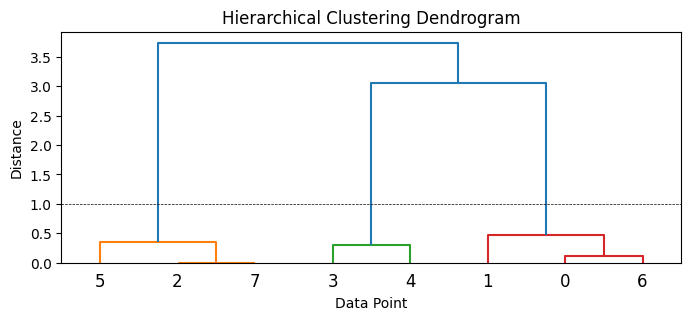

In [35]:
#Let's visualize the dendrogram
plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0,c='k',ls='--',lw=0.5);

In [37]:
from scipy.cluster.hierarchy import fcluster
max_dist=1.0

cluster_labels=fcluster(Z,max_dist,criterion='distance')
cluster_labels=pd.DataFrame(cluster_labels,columns=['ClusterLabel'])
pd.concat([corpus_df,cluster_labels],axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,3
1,Love this blue and beautiful sky!,weather,3
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, e...",food,2
4,"I love green eggs, ham, sausages and bacon!",food,2
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beaut...,weather,3
7,The dog is lazy but the brown fox is quick!,animals,1
